# <center><b>Python for Data Science</b></center>
# <center><b>Lessons 19 & 20</b></center>
# <center><b>Pandas</b></center>
# <center><b>Presentation 10: Working with Text Data in Pandas</b></center>

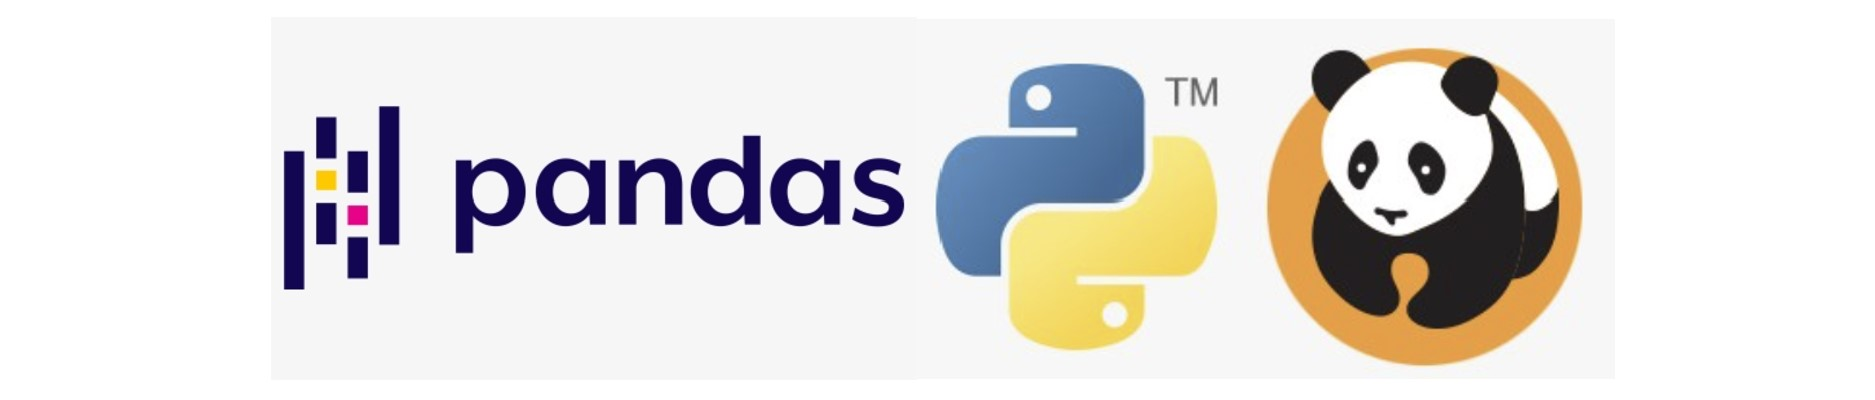

<font size="6"><center>[Link: Pandas Documentation](https://pandas.pydata.org/docs/)</center></font>

##  <span style="color:red">TABLE OF CONTENTS</span>

1. [Letter Casing and Whitespace](#1)<br>
2. [String Slicing](#2)<br>
3. [String Slicing and Character Replacement](#3)<br>
4. [Boolean Methods](#4)<br>
5. [Splitting Strings](#5)<br>
6. [A Note On Regular Expressions](#6)

**Note:**  The video below is an excellent complement to this presentation.

[**How do I use string methods in pandas?**](https://www.youtube.com/watch?v=bofaC0IckHo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=13)

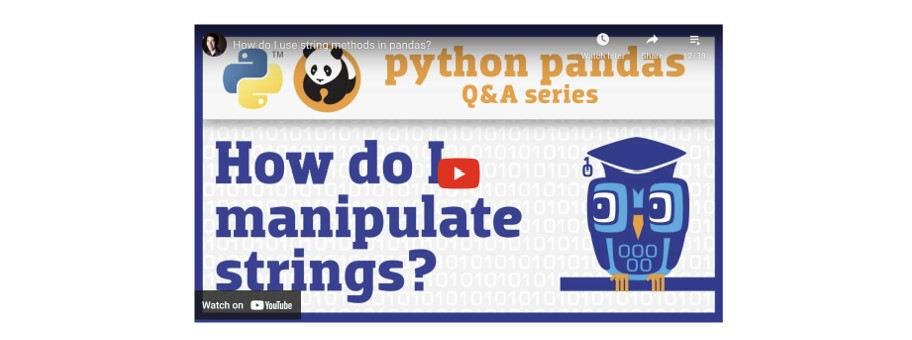

In [3]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [4]:
import pandas as pd
import numpy as np

<div class="alert alert-block alert-warning">
    <b><font size="4">Files needed for this presentation:</font></b>
</div>

[**chicago_food_inspections.csv**](https://drive.google.com/file/d/1_rsXK21y6FT6wLZ8liRPe9B-DlMugJDe/view?usp=share_link)

- This data set is a listing of more than 150,000 food inspections conducted across the city of Chicago. 
- The CSV includes only two columns: one with an establishment’s name and the other with its risk ranking.
- The four risk levels are Risk 1 (High), Risk 2 (Medium), Risk 3 (Low), and a special All for the worst offenders.
- **NOTE;** chicago_food_inspections.csv is a modified version of a data set available from the city of Chicago (http://mng.bz/9N60). 
- There are typos and inconsistencies within the data; we have preserved them so that you can see the data irregularities that appear in the real world. 
- You are encouraged to consider how you can optimize this data with the techniques you will learn in this presentation.

***

[**customers.csv**](https://drive.google.com/file/d/1MhQU-bOwUbCRGkITbGgbo9n8GWybnBKL/view?usp=share_link)

- This data set is a collection of fictional customers. 
- Each row includes the customer’s Name and Address.

In [ ]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

In [ ]:
# conventional way to import pandas and numpy

import pandas as pd
import numpy as np

<div class="alert alert-block alert-info"<br>
     
# <center>WORKING WITH TEXT DATA IN PANDAS</center>
</div>

- Text data can get quite messy. Real-world data sets are riddled with incorrect characters, improper letter casings, whitespace, and more. 
- The process of cleaning data is called wrangling or munging. 
- Often, the majority of our data analysis is dedicated to munging. 
- We may know the insight we want to derive early on, but the difficulty lies in arranging the data in a suitable shape for the manipulation. 
- Luckily for us, one of the primary motivations behind pandas was easing the difficulty of cleaning up improperly formatted text values. The library is battle-tested and flexible. 
- In this presentation, we will learn how to use pandas to fix all sorts of imperfections in our text data sets. 


<a class="anchor" id="1"></a>
# <span style="color:blue"><b>1. Letter Casing and Whitespace</b></span>

In [6]:
 inspections = pd.read_csv("chicago_food_inspections.csv")
 inspections

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)
...,...,...
153805,WOLCOTT'S,Risk 1 (High)
153806,DUNKIN DONUTS/BASKIN-ROBBINS,Risk 2 (Medium)
153807,Cafe 608,Risk 1 (High)
153808,mr.daniel's,Risk 1 (High)


- We immediately see an issue in the Name column: inconsistency in letter casing. 
- Most row values are uppercase, some are lowercase ("mr.daniel's"), and some are normal case ("Café 608").
- The preceding output does not show another problem hiding in inspections: the Name column’s values are surrounded by whitespace. 
- We can spot the extra spacing more easily if we isolate the Name Series with square-bracket syntax. 
- Notice that the ends of the rows do not align.

In [7]:
inspections["Name"].head()

0     MARRIOT MARQUIS CHICAGO   
1                    JETS PIZZA 
2                     ROOM 1520 
3      MARRIOT MARQUIS CHICAGO  
4                  CHARTWELLS   
Name: Name, dtype: object

- We can use the values attribute on the Series to get the underlying NumPy ndarray.

In [9]:
inspections["Name"].head().values

array([' MARRIOT MARQUIS CHICAGO   ', ' JETS PIZZA ', '   ROOM 1520 ',
       '  MARRIOT MARQUIS CHICAGO  ', ' CHARTWELLS   '], dtype=object)

- Let’s focus on the whitespace first. We’ll deal with the letter casings a little later.
- The Series object’s str attribute exposes a StringMethods object, a powerful toolbox of methods for working with strings

In [11]:
 inspections["Name"].str

- Any time we’d like to perform string manipulations, we invoke a method on the StringMethods object rather than the Series itself. 
- Some methods work like Python’s native string methods, whereas other methods are exclusive to pandas. 

***

- We can use the strip family of methods to remove whitespace from a string. 
- The lstrip (left strip) method removes whitespace from the beginning of a string. 
- Here is a basic example.

In [12]:
 dessert = " cheesecake "
 dessert.lstrip()

'cheesecake '

- The rstrip (right strip) method removes whitespace from the end of a string.

In [17]:
dessert.rstrip()

' cheesecake'

In [ ]:
The strip method removes whitespace from both ends of a string.

In [16]:
dessert.strip()

'cheesecake'

- These three strip methods are available on the StringMethods object. 
- Each one returns a new Series object with the operation applied to every column value. 
- Let’s invoke each of them.

In [18]:
inspections["Name"].str.lstrip().head()

0    MARRIOT MARQUIS CHICAGO   
1                   JETS PIZZA 
2                    ROOM 1520 
3     MARRIOT MARQUIS CHICAGO  
4                 CHARTWELLS   
Name: Name, dtype: object

In [19]:
 inspections["Name"].str.rstrip().head()

0      MARRIOT MARQUIS CHICAGO
1                   JETS PIZZA
2                    ROOM 1520
3      MARRIOT MARQUIS CHICAGO
4                   CHARTWELLS
Name: Name, dtype: object

In [20]:
 inspections["Name"].str.strip().head()

0    MARRIOT MARQUIS CHICAGO
1                 JETS PIZZA
2                  ROOM 1520
3    MARRIOT MARQUIS CHICAGO
4                 CHARTWELLS
Name: Name, dtype: object

- Now we can overwrite our existing Series with the new one that has no extra whitespace. 
- On the right side of an equal sign, we’ll use the strip code to create the new Series. 
- On the left side, we’ll use square-bracket syntax to denote the column we’d like to overwrite. 
- Python processes the right side of the equal sign first. 
- In summary, we use the Name column to create a new Series without whitespace and then overwrite the Name column with that new Series.

In [22]:
 inspections["Name"] = inspections["Name"].str.strip()

In [24]:
inspections["Name"].head(10)

0      MARRIOT MARQUIS CHICAGO
1                   JETS PIZZA
2                    ROOM 1520
3      MARRIOT MARQUIS CHICAGO
4                   CHARTWELLS
5        SHRIMP'S FISH CHICKEN
6              ART'S DRIVE INN
7                      VINCENT
8    CAPTAIN HOOKS OF DAN RYAN
9             JIBARITO'S Y MAS
Name: Name, dtype: object

- This one-line solution is suitable for a small data set, but it may quickly become tedious for one with a large number of columns. 
- How can we quickly apply the same logic to all DataFrame columns? 
- You may recall the columns attribute, which exposes the iterable Index object that holds the DataFrame’s column names.

In [25]:
 inspections.columns

Index(['Name', 'Risk'], dtype='object')

- We can use Python’s for loop to iterate over each column, extract it dynamically from the DataFrame, invoke the str.strip method to return a new Series, and overwrite the original column. 
- The logic requires only two lines.

In [26]:
for column in inspections.columns:
 inspections[column] = inspections[column].str.strip()

In [27]:
inspections.head(10)

,Name,Risk
0,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
1,JETS PIZZA,Risk 2 (Medium)
2,ROOM 1520,Risk 3 (Low)
3,MARRIOT MARQUIS CHICAGO,Risk 1 (High)
4,CHARTWELLS,Risk 1 (High)
5,SHRIMP'S FISH CHICKEN,Risk 2 (Medium)
6,ART'S DRIVE INN,Risk 1 (High)
7,VINCENT,Risk 1 (High)
8,CAPTAIN HOOKS OF DAN RYAN,Risk 2 (Medium)
9,JIBARITO'S Y MAS,Risk 1 (High)


- All of Python’s character casing methods are available on the StringMethods object.
- The lower method, for example, lowercases all string characters.

In [31]:
inspections["Name"].str.lower().head()

0    marriot marquis chicago
1                 jets pizza
2                  room 1520
3    marriot marquis chicago
4                 chartwells
Name: Name, dtype: object

- The complementary str.upper method returns a Series with uppercase strings.
- The next example invokes the method on a different Series because the Name column is mostly uppercase already:

In [33]:
steaks = pd.Series(["porterhouse", "filet mignon", "ribeye"])
steaks

0     porterhouse
1    filet mignon
2          ribeye
dtype: object

In [34]:
 steaks.str.upper()

0     PORTERHOUSE
1    FILET MIGNON
2          RIBEYE
dtype: object

- Suppose that we want to get the establishments’ names in a more standardized, readable format. 
- We can use the str.capitalize method to capitalize the first letter of each string in the Series.

In [35]:
inspections["Name"].str.capitalize().head()

0    Marriot marquis chicago
1                 Jets pizza
2                  Room 1520
3    Marriot marquis chicago
4                 Chartwells
Name: Name, dtype: object

- That’s a step in the right direction, but perhaps the best method available is str.title, which capitalizes each word’s first letter. 
- Pandas uses spaces to identify where one word ends and the next begins.

In [36]:
inspections["Name"].str.title().head()


0    Marriot Marquis Chicago
1                 Jets Pizza
2                  Room 1520
3    Marriot Marquis Chicago
4                 Chartwells
Name: Name, dtype: object

- The title method is a fantastic option for dealing with locations, countries, cities, and people’s full names.

<a class="anchor" id="2"></a>
# <span style="color:blue"><b>2. String Slicing</b></span>

- Let’s turn our focus to the Risk column. 
- Each row’s value includes both a numeric and categorical representation of the risk (such as 1 and "High"). 
- Here’s a reminder of what the column looks like.

In [38]:
inspections["Risk"].head()

0      Risk 1 (High)
1    Risk 2 (Medium)
2       Risk 3 (Low)
3      Risk 1 (High)
4      Risk 1 (High)
Name: Risk, dtype: object

- Let’s say we want to extract the numeric risk value from each row. 
- This operation may appear simple, given the seemingly consistent format of each row, but we have to
tread carefully. 
- There is always room for deception in a data set this large.

In [39]:
len(inspections)

153810

- Do all rows follow a "Risk Number (Risk Level)" format? 
- We can find out by invoking the unique method, which returns a NumPy ndarray consisting of the column’s unique values.

In [40]:
 inspections["Risk"].unique()


array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

- We have to account for two additional values: missing NaNs and the 'All' string.
- How we deal with these values is ultimately up to the analyst and the business. 
- Are the values significant, or can they be discarded? 
- In this scenario, let’s propose a compromise: we’ll remove the missing NaN values and replace the "All" values with "Risk 4 (Extreme)". 
- We’ll pick this approach to ensure that all Risk values have a consistent format.
- We can remove missing values from a Series with the dropna method (we will discuss this method in greater detail in a future presentation). 
- We’ll pass its subset parameter a list of the DataFrame columns in which pandas should look for NaNs. 
- The next example removes rows in inspections with a NaN value in the Risk column.

In [41]:
inspections = inspections.dropna(subset = ["Risk"])

- Let’s check in again on unique values in the Risk column.

In [43]:
inspections["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All'],
      dtype=object)

- We can use the DataFrame’s helpful replace method to replace all occurrences of one value with another. 
- The method’s first parameter, **to_replace**, sets the value to search for, and its second parameter, **value**, specifies what to replace each occurrence of it with. 
- The next example replaces the "All" string values with "Risk 4 (Extreme)".

In [44]:
inspections = inspections.replace(to_replace = "All", value = "Risk 4 (Extreme)")

- Now we have a consistent format for all values in the Risk column.

In [46]:
inspections["Risk"].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
       'Risk 4 (Extreme)'], dtype=object)

- Next, let’s continue with our original goal of extracting each row’s risk number.

<a class="anchor" id="3"></a>
# <span style="color:blue"><b>3. String Slicing and Character Replacement</b></span>

- We can use the slice method on the StringMethods object to extract a substring from a string by index position. 
- The method accepts a starting index and an ending index as arguments. 
- The lower bound (the starting point) is inclusive, whereas theupper bound (the endpoint) is exclusive.
- Our risk number starts at index position 5 in each string. 
- The next example pullsthe characters from index position 5 up to (but not including) index position 6:

In [47]:
inspections["Risk"].str.slice(5, 6).head()

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: object

- We can also replace the slice method with Python’s list-slicing syntax. 
- The following code returns the same result as the preceding code.

In [48]:
inspections["Risk"].str[5:6].head()

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: object

- What if we want to extract the categorical ranking ("High", "Medium", "Low", and"All") from each row? 
- This challenge is made difficult by the different lengths of the words; we cannot extract the same number of characters from a starting index position. 
- A few solutions are available. We’ll discuss the most resilient option, regularexpressions, in a later section.

- For now, let’s attack the problem step by step. 
- We can start by using the slice method to extract each row’s risk category. 
- If we pass the slice method a single value, pandas will use it as the lower bound and extract until the end of the string.
- The next example pulls the characters from index position 8 to the end of each string. 
- The character at index position 8 is the first letter in each risk type (the "H" in "High", the "M" in "Medium", the "L" in "Low", and the "E" in "Extreme").

In [49]:
inspections["Risk"].str.slice(8).head()

0      High)
1    Medium)
2       Low)
3      High)
4      High)
Name: Risk, dtype: object

- We can use Python’s list-slicing syntax, too. 
- Inside the square brackets, provide a starting index position followed by a single colon. 
- The result is identical.

In [50]:
inspections["Risk"].str[8:].head()

0      High)
1    Medium)
2       Low)
3      High)
4      High)
Name: Risk, dtype: object

- We still have to deal with the pesky closing parentheses. 
- Here’s a cool solution: pass anegative argument to the str.slice method. 
- A negative argument sets the index bound relative to the end of the string: -1 extracts up to the last character, -2 extracts up to the second-to-last character, and so on. 
- Let’s extract a substring from index position 8 up until the last character in each string.

In [51]:
inspections["Risk"].str.slice(8, -1).head()

0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: object

- We’ve got it! 
- If you prefer list-slicing syntax, you can pass the -1 after the colon inside the square brackets.

In [52]:
inspections["Risk"].str[8:-1].head()

0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: object

- Another strategy we can use to remove the closing parentheses is the str.replace method. 
- We can replace each closing parentheses with an empty string—a string without characters.
- Each str method returns a new Series object with its own str attribute. 
- This aspect allows us to chain multiple string methods in sequence, as long as we reference the str attribute in each method invocation. 
- The next example chains the slice and replace methods.

In [53]:
inspections["Risk"].str.slice(8).str.replace(")", "").head()

<ipython-input-53-b0d7687b1461>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  inspections["Risk"].str.slice(8).str.replace(")", "").head()


0      High
1    Medium
2       Low
3      High
4      High
Name: Risk, dtype: object

- By slicing from a middle index position and removing the ending parenthesis, we were able to isolate the Risk level for each row.

<a class="anchor" id="4"></a>
# <span style="color:blue"><b>4. Boolean Methods</b></span>

- The previous section introduced methods such as upper and slice that return a Series of strings. 
- Other methods available on the StringMethods object return a Series of Booleans. 
- These methods can prove to be particularly helpful for filtering a DataFrame.
- Suppose that we want to isolate all establishments with the word "Pizza" in their names. In vanilla Python, we use the in operator to search for a substring with a string.

In [55]:
"Pizza" in "Jets Pizza"

True

- The biggest challenge in string matching is case sensitivity. 
- Python will not find the string "pizza" in "Jets Pizza", for example, because of the mismatch in casing of the "p" character.

In [56]:
 "pizza" in "Jets Pizza"

False

- To solve this problem, we need to ensure consistent casing across all column values before we check for the presence of a substring. 
- We can look for a lowercase "pizza" in an all-lowercase Series or an uppercase "PIZZA" in an all-uppercase Series.
- Let’s go with the former approach.
- The contains method checks for a substring’s inclusion in each Series value.
- The method returns True when pandas finds the method’s argument within the row’s string and False when it does not. 
- The next example first lowercases the Name column with the lower method and then searches for "pizza" within each row.

In [57]:
inspections["Name"].str.lower().str.contains("pizza").head()

0    False
1     True
2    False
3    False
4    False
Name: Name, dtype: bool

- We have a Boolean Series, which we can use to extract all establishments with "Pizza" in their name.

In [59]:
has_pizza = inspections["Name"].str.lower().str.contains("pizza")

inspections[has_pizza]

,Name,Risk
1,JETS PIZZA,Risk 2 (Medium)
19,NANCY'S HOME OF STUFFED PIZZA,Risk 1 (High)
27,"NARY'S GRILL & PIZZA ,INC.",Risk 1 (High)
29,NARYS GRILL & PIZZA,Risk 1 (High)
68,COLUTAS PIZZA,Risk 1 (High)
...,...,...
153756,ANGELO'S STUFFED PIZZA CORP,Risk 1 (High)
153764,COCHIAROS PIZZA #2,Risk 1 (High)
153772,FERNANDO'S MEXICAN GRILL & PIZZA,Risk 1 (High)
153788,REGGIO'S PIZZA EXPRESS,Risk 1 (High)


- Notice that pandas preserves the original letter casing of the values in Name. 
- The inspections DataFrame is never mutated. 
- The lower method returns a new Series, and the contains method we invoke on it returns another new Series, which pandas uses to filter rows from the original DataFrame.
- What if we want to be more precise in our targeting, perhaps extracting all establishments beginning with the string "tacos"? - Now we care about the position of the substring within each string. 
- The str.startswith method solves the problem, returning True if a string begins with its argument.

In [60]:
inspections["Name"].str.lower().str.startswith("tacos").head()

0    False
1    False
2    False
3    False
4    False
Name: Name, dtype: bool

In [61]:
starts_with_tacos = (inspections["Name"].str.lower().str.startswith("tacos"))
 
inspections[starts_with_tacos]

,Name,Risk
69,TACOS NIETOS,Risk 1 (High)
556,TACOS EL TIO 2 INC.,Risk 1 (High)
675,TACOS DON GABINO,Risk 1 (High)
958,TACOS EL TIO 2 INC.,Risk 1 (High)
1036,TACOS EL TIO 2 INC.,Risk 1 (High)
...,...,...
143587,TACOS DE LUNA,Risk 1 (High)
144026,TACOS GARCIA,Risk 1 (High)
146174,Tacos Place's 1,Risk 1 (High)
147810,TACOS MARIO'S LIMITED,Risk 1 (High)


- The complementary str.endswith method checks for a substring at the end of each Series string.

In [62]:
ends_with_tacos = (inspections["Name"].str.lower().str.endswith("tacos"))
 
inspections[ends_with_tacos]

,Name,Risk
382,LAZO'S TACOS,Risk 1 (High)
569,LAZO'S TACOS,Risk 1 (High)
2652,FLYING TACOS,Risk 3 (Low)
3250,JONY'S TACOS,Risk 1 (High)
3812,PACO'S TACOS,Risk 1 (High)
...,...,...
151121,REYES TACOS,Risk 1 (High)
151318,EL MACHO TACOS,Risk 1 (High)
151801,EL MACHO TACOS,Risk 1 (High)
153087,RAYMOND'S TACOS,Risk 1 (High)


- Whether you’re looking for text at the beginning, middle, or end of a string, the StringMethods object has a helper method to assist you.

<a class="anchor" id="5"></a>
# <span style="color:blue"><b>5. Splitting Strings</b></span>

- Our next data set is a collection of fictional customers. 
- Each row includes the customer’s Name and Address. 
- Let’s import the customers.csv file with the read_csv function and assign the DataFrame to a customers variable.

In [64]:
customers = pd.read_csv("customers.csv")
 
customers.head()

,Name,Address
0,Frank Manning,"6461 Quinn Groves, East Matthew, New Hampshire..."
1,Elizabeth Johnson,"1360 Tracey Ports Apt. 419, Kyleport, Vermont,..."
2,Donald Stephens,"19120 Fleming Manors, Prestonstad, Montana, 23495"
3,Michael Vincent III,"441 Olivia Creek, Jimmymouth, Georgia, 82991"
4,Jasmine Zamora,"4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7..."


- We can use the str.len method to return the length of each row’s string. 
- Row 0’s value of "Frank Manning", for example, has a length of 13 characters.

In [65]:
customers["Name"].str.len().head()

0    13
1    17
2    15
3    19
4    14
Name: Name, dtype: int64

- Suppose that we want to isolate each customer’s first and last names in two separate columns. 
- You may be familiar with Python’s split method, which separates a string by using a specified delimiter. 
- The method returns a list consisting of all the substrings after the split. 
- The next example splits a phone number into a list of three strings by using a hyphen delimiter.

In [66]:
phone_number = "555-123-4567"
 
phone_number.split("-")

['555', '123', '4567']

- The str.split method performs the same operation on each row in a Series; its return value is a Series of lists. 
- We pass the delimiter to the method’s first parameter, pat (short for pattern). 
- The next example splits the values in Name by the presence of a space.

In [67]:
customers["Name"].str.split(pat = " ").head()

0           [Frank, Manning]
1       [Elizabeth, Johnson]
2         [Donald, Stephens]
3    [Michael, Vincent, III]
4          [Jasmine, Zamora]
Name: Name, dtype: object

In [68]:
# This line is equivalent to the line above

customers["Name"].str.split(" ").head()

0           [Frank, Manning]
1       [Elizabeth, Johnson]
2         [Donald, Stephens]
3    [Michael, Vincent, III]
4          [Jasmine, Zamora]
Name: Name, dtype: object

- Next, let’s reinvoke the str.len method on this new Series of lists to get the length of each list. 
- Pandas reacts dynamically to whatever data type a Series is storing.

In [69]:
customers["Name"].str.split(" ").str.len().head()

0    2
1    2
2    2
3    3
4    2
Name: Name, dtype: int64

- We have a small issue. Due to suffixes such as "MD" and "Jr", some names have more than two words. We can see an example at  index position 3: Michael Vincent III, which pandas splits into a list of three elements. 
- To ensure an equal number of elements per list, we can limit the number of splits. 
- If we set a maximum threshold of one split, pandas will split a string at the first space and stop. Then we’ll have a Series consisting of two-element lists. 
- Each list will hold the customer’s first name and anything that follows it.
- The next example passes an argument of 1 to the split method’s n parameter, which sets the maximum number of splits. 
- Take a  look at how pandas deals with "Michael Vincent III" at index 3.

In [70]:
customers["Name"].str.split(pat = " ", n = 1).head()

0          [Frank, Manning]
1      [Elizabeth, Johnson]
2        [Donald, Stephens]
3    [Michael, Vincent III]
4         [Jasmine, Zamora]
Name: Name, dtype: object

- Now all our lists have equal lengths. 
- We can use str.get to pull out a value from each row’s list based on its index position. 
- We can target index 0, for example, to pull out the first element of each list, which is the customer’s first name.

In [71]:
customers["Name"].str.split(pat = " ", n = 1).str.get(0).head()

0        Frank
1    Elizabeth
2       Donald
3      Michael
4      Jasmine
Name: Name, dtype: object

- To pull the last name from each list, we could pass the get method an index position of 1.

In [73]:
customers["Name"].str.split(pat = " ", n = 1).str.get(1).head()

0        Manning
1        Johnson
2       Stephens
3    Vincent III
4         Zamora
Name: Name, dtype: object

- The get method also supports negative arguments. 
- An argument of -1 extracts the last element from each row’s list, regardless of how many elements the list holds. 
- The following code produces the same result as the preceding code and is a bit more versatile in scenarios in which the lists have different lengths.

In [74]:
customers["Name"].str.split(pat = " ", n = 1).str.get(-1).head()


0        Manning
1        Johnson
2       Stephens
3    Vincent III
4         Zamora
Name: Name, dtype: object

- So far, so good. We’ve used two separate get method calls to extract the first and last names in two separate Series. 
- Wouldn’t it be nice to perform the same logic in a single method call? 
- Luckily, the str.split method accepts an expand parameter, and when we pass it an argument of True, the method returns a new DataFrame instead of a Series of lists:


In [75]:
 customers["Name"].str.split(pat = " ", n = 1, expand = True).head()

,0,1
0,Frank,Manning
1,Elizabeth,Johnson
2,Donald,Stephens
3,Michael,Vincent III
4,Jasmine,Zamora


- We’ve got a new DataFrame! Because we did not provide custom names for the columns, pandas defaulted to a numeric index on the column axis.
- Be careful in these scenarios. If we do not limit the number of splits with the n parameter, pandas will place None values in rows that do not have sufficient elements.

In [76]:
customers["Name"].str.split(pat = " ", expand = True).head()

,0,1,2
0,Frank,Manning,None
1,Elizabeth,Johnson,None
2,Donald,Stephens,None
3,Michael,Vincent,III
4,Jasmine,Zamora,None


- Now that we’ve isolated the customers’ names, let’s attach the new two-column DataFrame to the existing customers DataFrame. - - On the right side of an equal sign, we’ll use the split code to create the DataFrame. 
- On the left side of the equal sign, we’ll provide a list of column names inside a pair of square brackets. 
- Pandas will append these columns to customers. 
- The next example adds two new columns, First Name and Last Name, and populates them with the DataFrame returned by the split
method.


In [78]:
customers[["First Name", "Last Name"]] = customers["Name"].str.split(pat = " ", n = 1, expand = True)

customers

,Name,Address,First Name,Last Name
0,Frank Manning,"6461 Quinn Groves, East Matthew, New Hampshire...",Frank,Manning
1,Elizabeth Johnson,"1360 Tracey Ports Apt. 419, Kyleport, Vermont,...",Elizabeth,Johnson
2,Donald Stephens,"19120 Fleming Manors, Prestonstad, Montana, 23495",Donald,Stephens
3,Michael Vincent III,"441 Olivia Creek, Jimmymouth, Georgia, 82991",Michael,Vincent III
4,Jasmine Zamora,"4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7...",Jasmine,Zamora
...,...,...,...,...
9956,Dana Browning,"762 Andrew Views Apt. 254, North Paul, New Mex...",Dana,Browning
9957,Amanda Anderson,"44188 Day Crest Apt. 901, Lake Marcia, Maine, ...",Amanda,Anderson
9958,Eric Davis,"73015 Michelle Squares, Watsonville, West Virg...",Eric,Davis
9959,Taylor Hernandez,"129 Keith Greens, Haleyfurt, Oklahoma, 98916",Taylor,Hernandez


- Excellent! Now that we’ve extracted the customers’ names to separate columns, we can delete the original Name column. 
- One way is to use the drop method on our customers DataFrame. 
- We’ll pass the column’s name to the labels parameter and an argument of "columns" to the axis parameter. 
- We need to include the axis parameter to tell pandas to look for the Name label in the columns instead of the rows.

In [79]:
customers = customers.drop(labels = "Name", axis = "columns")

- Remember that mutational operations do not produce output in Jupyter Notebook.
- We must print the DataFrame to see the result.

In [81]:
customers.head()

,Address,First Name,Last Name
0,"6461 Quinn Groves, East Matthew, New Hampshire...",Frank,Manning
1,"1360 Tracey Ports Apt. 419, Kyleport, Vermont,...",Elizabeth,Johnson
2,"19120 Fleming Manors, Prestonstad, Montana, 23495",Donald,Stephens
3,"441 Olivia Creek, Jimmymouth, Georgia, 82991",Michael,Vincent III
4,"4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7...",Jasmine,Zamora


- There we go. The Name column is gone, and we have split its contents across two new columns.

<a class="anchor" id="6"></a>
# <span style="color:blue"><b>6. A Note On Regular Expressions</b></span>

- Any discussion of working with text data is incomplete without mentioning regular expressions, also known as RegEx. 
- A regular expression is a search pattern that looks for a sequence of characters within a string.
- We declare regular expressions with a special syntax consisting of symbols and characters. 
- \d, for example, matches any numeric digit between 0 and 9. 
- With regular expressions, we can define complex search patterns by targeting lowercase characters, uppercase characters, digits, slashes, whitespace, string boundaries, and more.
-  Suppose that a phone number like 555-555-5555 is hidden in a larger string. 
- We can use regular expressions to define a search algorithm that extracts sequences of three sequential digits, a dash, three sequential digits, another dash, and four more sequential digits. 
- That level of granularity grants regular expressions their power.
- Here’s a quick example that shows the syntax in action. 
- The next code sample uses the replace method on the Street column to swap all occurrences of four sequential digits with an asterisk character.

In [84]:
customers["Address"].head()

0    6461 Quinn Groves, East Matthew, New Hampshire...
1    1360 Tracey Ports Apt. 419, Kyleport, Vermont,...
2    19120 Fleming Manors, Prestonstad, Montana, 23495
3         441 Olivia Creek, Jimmymouth, Georgia, 82991
4    4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7...
Name: Address, dtype: object

In [85]:
 customers["Address"].str.replace("\d{4,}", "*", regex = True).head()


0    * Quinn Groves, East Matthew, New Hampshire, *
1     * Tracey Ports Apt. 419, Kyleport, Vermont, *
2         * Fleming Manors, Prestonstad, Montana, *
3          441 Olivia Creek, Jimmymouth, Georgia, *
4       * Chelsey Ford Apt. 310, Karamouth, Utah, *
Name: Address, dtype: object

- Regular expressions are a highly specialized technical topic. 
- Whole books are written on the complexities of RegEx. 
- For now, it’s important to note that pandas supports RegEx arguments for most of its string methods. 